<a href="https://colab.research.google.com/github/6arlos6/Quantum_machin_learning_Quantum_dots/blob/main/Pruebas_DRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
!pip install pennylane
!pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 9.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 11.4 MB/s eta 0:00:00


In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Hacer circulo data sintetica:

In [3]:
# Set a random seed
np.random.seed(42)

In [4]:
# Make a dataset of points inside and outside of a circle
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    """
    Generates a dataset of points with 1/0 labels inside a given radius.

    Args:
        samples (int): number of samples to generate
        center (tuple): center of the circle
        radius (float: radius of the circle

    Returns:
        Xvals (array[tuple]): coordinates of points
        yvals (array[int]): classification labels
    """
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)
    return np.array(Xvals, requires_grad=False), np.array(yvals, requires_grad=False)

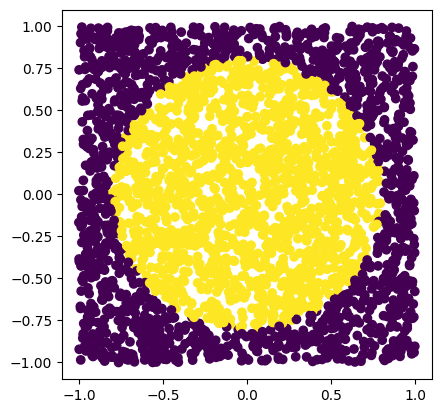

In [5]:
# data
x,y = circle(3000)
x = x.numpy()
plt.scatter(x[:,0],x[:,1], c=y.numpy())
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()

## Lunas

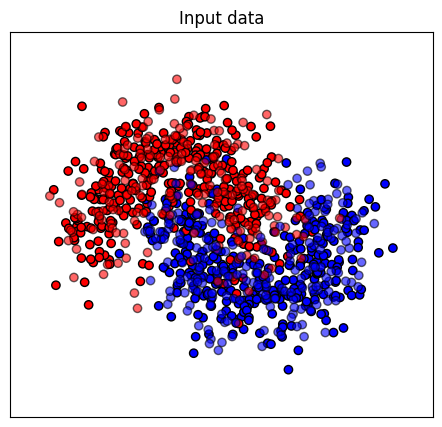

In [6]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

datasets = [
    make_moons(n_samples=1000, noise=0.3, random_state=0)
]

figure = plt.figure(figsize=(12, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), 1 + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

# Crear matrix densidad:

In [7]:
# Define output labels as quantum state vectors
def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return state * np.conj(state).T

# Modelo

The operation `qml.expval(qml.Hermitian(y, wires=[0]))` in PennyLane for quantum machine learning (QML) is used to compute the fidelity of a quantum state or quantum circuit with respect to a target state or circuit.

The fidelity is a measure of the similarity between two quantum states, and it is defined as the overlap between the two states squared. In other words, the fidelity tells us how much of the target state is contained in the state produced by our circuit.

The operation `qml.Hermitian(y, wires=[0])` creates a Hermitian operator on the first wire of the quantum circuit, with the matrix `y` as its representation. The Hermitian operator represents a measurement that is performed on the quantum state produced by the circuit, and the `expval` function computes the expectation value of this measurement.

In the case of computing fidelity, the y matrix represents the target state or circuit, and the expectation value of the Hermitian operator is equivalent to the overlap between the target state and the state produced by our circuit. By taking the square root of the expectation value, we obtain the fidelity of our circuit with respect to the target state.

Therefore, the operation `qml.expval(qml.Hermitian(y, wires=[0]))` in PennyLane for QML is used to compute the fidelity of a quantum state or quantum circuit with respect to a target state or circuit.

$$\begin{split}R(\phi,\theta,\omega) = RZ(\omega)RY(\theta)RZ(\phi)= \begin{bmatrix}
e^{-i(\phi+\omega)/2}\cos(\theta/2) & -e^{i(\phi-\omega)/2}\sin(\theta/2) \\
e^{-i(\phi-\omega)/2}\sin(\theta/2) & e^{i(\phi+\omega)/2}\cos(\theta/2)
\end{bmatrix}.\end{split}$$

In [8]:
label_0 = [[1], [0]]
label_1 = [[0], [1]]
state_labels = np.array([label_0, label_1], requires_grad=False)

dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev, interface="autograd")
def qcircuit(params, x, y):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for p in params:
        qml.Rot(*x, wires=0) # RZ * RY * RZ -> data
        qml.Rot(*p, wires=0) # RZ * RY * RZ -> parameters
    
    # qml.expval = Expectation value of the supplied observable.
    return qml.expval(qml.Hermitian(y, wires=[0]))

# Primera visualizacion

In [9]:
num_qubits = 1  # Number of qubits
dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit_test1(params):
  qml.BasisState([0], wires=0)
  qml.RX(params[0], wires=0)
  salida = qml.state()
  return salida

In [10]:
num_qubits = 1  # Number of qubits
dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit_test2(params, x):
  for p in params:
      qml.Rot(*x, wires=0) # RZ * RY * RZ -> data
      qml.Rot(*p, wires=0) # RZ * RY * RZ -> parameter
  salida = qml.state()
  return salida

In [11]:
np.random.seed(0)
params = np.random.uniform(0, 2*np.pi, size=1)
state = circuit_test1(params)

In [12]:
alpha, beta = state
print(alpha, beta)

(-0.15275179101324163+0j) -0.9882645851907509j


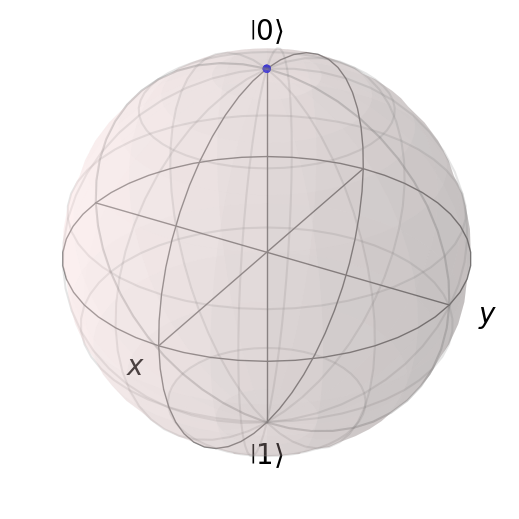

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch

# Punto en la esfera de Bloch
coords = [0, 0, 1]  # Coordenadas (x, y, z) del punto
bloch_sphere = Bloch()
bloch_sphere.add_points(coords)
bloch_sphere.show()


In [14]:
def to_spherical(state):
    r0 = np.abs(state[0])
    ϕ0 = np.angle(state[0])
    r1 = np.abs(state[1])
    ϕ1 = np.angle(state[1])
    r = np.sqrt(r0 ** 2 + r1 ** 2)
    θ = 2 * np.arccos(r0 / r)
    ϕ = ϕ1 - ϕ0
    return [r, θ, ϕ]

def to_cartesian(polar):
    r = polar[0]
    θ = polar[1]
    ϕ = polar[2]
    x = r * np.sin(θ) * np.cos(ϕ)
    y = r * np.sin(θ) * np.sin(ϕ)
    z = r * np.cos(θ)
    return [x, y, z]

In [15]:
my_state = [complex(alpha), complex(beta)]
polar = to_spherical(my_state)
xx, yy, zz = to_cartesian(polar)

In [16]:
# Punto en la esfera de Bloch
coords = [xx, yy, zz]  # Coordenadas (x, y, z) del punto
bloch_sphere = Bloch()
bloch_sphere.add_points(coords)

x = (complex(alpha)*qutip.basis(2, 0) + complex(beta)*qutip.basis(2, 1)).unit()
bloch_sphere.add_states([x])
b.render()


bloch_sphere.show()

NameError: ignored

### Funciones de costo





## Fidelidad

$$\texttt{Cost} = \sum_{\texttt{data points}} (1 - \texttt{fidelity}(\psi_{\texttt{output}}(\vec x, \vec \theta), \psi_{\texttt{label}}))$$

In [17]:
def cost(params, x, y, state_labels=None):
    """Cost function to be minimized.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): array of state representations for labels

    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    loss = 0.0
    dm_labels = [density_matrix(s) for s in state_labels]
    for i in range(len(x)):
        f = qcircuit(params, x[i], dm_labels[y[i]])
        loss = loss + (1 - f) ** 2
    return loss / len(x)

## Renyi

In [18]:
import pennylane as qml
from pennylane import numpy as np

def renyi2_entropy(params, x, y, state_labels=None):
    dev = qml.device("default.qubit", wires=y.shape[0])
    
    @qml.qnode(dev)
    def circuit():
        qml.load(y, wires=list(range(y.shape[0])))
        return qml.state()

    # Get the state vector corresponding to the density matrix
    state = circuit()

    # Compute the eigenvalues of the density matrix
    eigenvalues, _ = np.linalg.eigh(y)
    # Sort eigenvalues in descending order
    eigenvalues = eigenvalues[::-1]
    # Truncate eigenvalues to remove any small negative values
    eigenvalues = np.maximum(eigenvalues, 0)
    # Normalize the eigenvalues to ensure they sum to 1
    eigenvalues /= np.sum(eigenvalues)
    
    # Compute the Renyi 2 entropy
    renyi2 = -np.log2(np.sum(eigenvalues**2))

    return renyi2

In [19]:
def test(params, x, y, state_labels=None):
    """
    Tests on a given set of data.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        predicted (array([int]): predicted labels for test data
        output_states (array[float]): output quantum states from the circuit
    """
    fidelity_values = []
    dm_labels = [density_matrix(s) for s in state_labels]
    predicted = []

    for i in range(len(x)):
        fidel_function = lambda y: qcircuit(params, x[i], y)
        fidelities = [fidel_function(dm) for dm in dm_labels]
        best_fidel = np.argmax(fidelities)

        predicted.append(best_fidel)
        fidelity_values.append(fidelities)

    return np.array(predicted), np.array(fidelity_values)

In [20]:
def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

In [21]:
def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data

    Args:
        inputs (array[float]): input data
        targets (array[float]): targets

    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]

# Train

In [ ]:
# Generate training and test data
num_training = 2000
num_test = 200

Xdata, y_train = circle(num_training)
# zeros es porque entrada es R2 y se necesita R3, pero articulo dice dejar en ceros:
X_train = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False)))

Xtest, y_test = circle(num_test)
X_test = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False)))


# Train using Adam optimizer and evaluate the classifier
num_layers = 8
learning_rate = 0.1
epochs = 6
batch_size = 32

opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)

# initialize random weights
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)

predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
accuracy_train = accuracy_score(y_train, predicted_train)

predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
accuracy_test = accuracy_score(y_test, predicted_test)

# save predictions with random weights for comparison
initial_predictions = predicted_test

loss = cost(params, X_test, y_test, state_labels)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(X_train, y_train, batch_size=batch_size):
        params, _, _, _ = opt.step(cost, params, Xbatch, ybatch, state_labels)

    predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = cost(params, X_train, y_train, state_labels)

    predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )

Epoch:  0 | Cost: 0.264111 | Train accuracy: 0.551500 | Test Accuracy: 0.555000
Epoch:  1 | Loss: 0.076833 | Train accuracy: 0.927000 | Test accuracy: 0.925000
Epoch:  2 | Loss: 0.073110 | Train accuracy: 0.930500 | Test accuracy: 0.915000
Epoch:  3 | Loss: 0.069221 | Train accuracy: 0.949000 | Test accuracy: 0.950000
Epoch:  4 | Loss: 0.067461 | Train accuracy: 0.948500 | Test accuracy: 0.950000


In [ ]:
def plot_data(x, y, fig=None, ax=None):
    """
    Plot data with red/blue values for a binary classification.

    Args:
        x (array[tuple]): array of data points as tuples
        y (array[int]): array of data points as tuples
    """
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    reds = y == 0
    blues = y == 1
    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: {}".format(i, params[i]))


fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(X_test, initial_predictions, fig, axes[0])
plot_data(X_test, predicted_test, fig, axes[1])
plot_data(X_test, y_test, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

# Visualizacion en bloch sphere

In [ ]:
Xdata, y_train = circle(num_training)
# zeros es porque entrada es R2 y se necesita R3, pero articulo dice dejar en ceros:
X_train = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False)))

In [ ]:
num_qubits = 1  # Number of qubits
dev = qml.device("default.qubit", wires=num_qubits)

@qml.qnode(dev)
def circuit_test2(params, x):
  for p in params:
      qml.Rot(*x, wires=0) # RZ * RY * RZ -> data
      qml.Rot(*p, wires=0) # RZ * RY * RZ -> parameter
  salida = qml.state()
  return salida

In [ ]:
params

tensor([[-0.89420754,  1.10212725, -0.55089343],
        [ 0.42138384,  0.86538558,  1.70544594],
        [-0.56120392,  0.52173962, -0.59293748],
        [-0.66642715,  0.93075783,  0.12438727]], requires_grad=True)

In [ ]:
for p in params:
  print(*p)

-0.8942075416663614 1.102127245178944 -0.5508934303677387
0.421383835658469 0.8653855835946557 1.705445942835831
-0.561203921483486 0.521739615074531 -0.5929374793629828
-0.6664271522292652 0.9307578292878446 0.12438726680017241


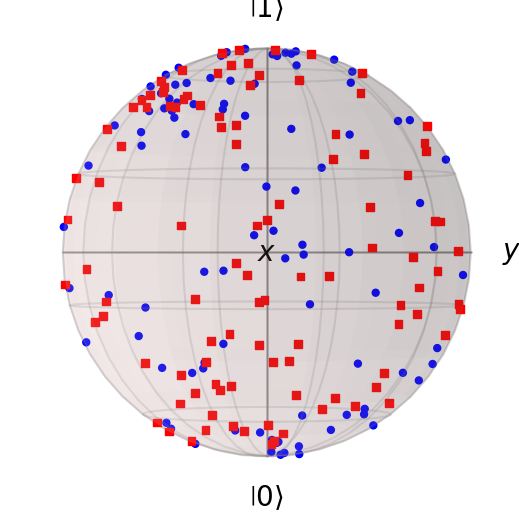

In [ ]:
states_class_A = []
states_class_B = []


Xa = []; Ya = []; Za = []
Xb = []; Yb = []; Zb = []

for i in range(len(X_test)):
  state = circuit_test2(params, X_test[i])
  alpha, beta = state
  my_state = [complex(alpha), complex(beta)]
  polar = to_spherical(my_state)
  xx, yy, zz = to_cartesian(polar)

  if int(y_train[i]) == 0:
    states_class_A.append(state)
    Xa.append(xx)
    Ya.append(yy)
    Za.append(zz)
  else:
    states_class_B.append(state)
    Xb.append(xx)
    Yb.append(yy)
    Zb.append(zz)
  


bloch_sphere = Bloch(view=[-90,180])
pnts = [Xa, Ya, Za]
bloch_sphere.add_points(pnts)
bloch_sphere.render()

bloch_sphere.add_points([Xb, Yb, Zb])
bloch_sphere.render()

bloch_sphere.show()


# Otra prueba

In [ ]:
# Generate training and test data
num_training = 2000
num_test = 200
#make_moons(n_samples=1000, noise=0.3, random_state=0)
Xdata, y_train = make_moons(n_samples=num_training, noise=0.3, random_state=0)
# zeros es porque entrada es R2 y se necesita R3, pero articulo dice dejar en ceros:
X_train = np.hstack((Xdata, np.zeros((Xdata.shape[0], 1), requires_grad=False)))

Xtest, y_test = make_moons(n_samples=num_test, noise=0.3, random_state=0)
X_test = np.hstack((Xtest, np.zeros((Xtest.shape[0], 1), requires_grad=False)))


# Train using Adam optimizer and evaluate the classifier
num_layers = 8
learning_rate = 0.1
epochs = 6
batch_size = 32

opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)

# initialize random weights
params = np.random.uniform(size=(num_layers, 3), requires_grad=True)

predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
accuracy_train = accuracy_score(y_train, predicted_train)

predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
accuracy_test = accuracy_score(y_test, predicted_test)

# save predictions with random weights for comparison
initial_predictions = predicted_test

loss = cost(params, X_test, y_test, state_labels)

print(
    "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
        0, loss, accuracy_train, accuracy_test
    )
)

for it in range(epochs):
    for Xbatch, ybatch in iterate_minibatches(X_train, y_train, batch_size=batch_size):
        params, _, _, _ = opt.step(cost, params, Xbatch, ybatch, state_labels)

    predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
    accuracy_train = accuracy_score(y_train, predicted_train)
    loss = cost(params, X_train, y_train, state_labels)

    predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
    accuracy_test = accuracy_score(y_test, predicted_test)
    res = [it + 1, loss, accuracy_train, accuracy_test]
    print(
        "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
            *res
        )
    )

Epoch:  0 | Cost: 0.393673 | Train accuracy: 0.407500 | Test Accuracy: 0.420000
Epoch:  1 | Loss: 0.094518 | Train accuracy: 0.880500 | Test accuracy: 0.875000
Epoch:  2 | Loss: 0.079206 | Train accuracy: 0.900500 | Test accuracy: 0.900000
Epoch:  3 | Loss: 0.078474 | Train accuracy: 0.904500 | Test accuracy: 0.890000
Epoch:  4 | Loss: 0.075273 | Train accuracy: 0.907000 | Test accuracy: 0.905000
Epoch:  5 | Loss: 0.073413 | Train accuracy: 0.904000 | Test accuracy: 0.905000
Epoch:  6 | Loss: 0.072788 | Train accuracy: 0.908500 | Test accuracy: 0.895000


Cost: 0.072788 | Train accuracy 0.908500 | Test Accuracy : 0.895000
Learned weights
Layer 0: [ 0.09151052 -0.83210613  1.61213839]
Layer 1: [ 0.70283219  2.13555791 -0.84320849]
Layer 2: [-1.10136068  2.75254557 -1.48099029]
Layer 3: [-0.02411163  0.58161189 -1.6072613 ]
Layer 4: [-0.68557429 -1.39017565  1.54281157]
Layer 5: [ 0.91398574  1.32521165 -1.76045415]
Layer 6: [ 1.32682581 -0.12478649  0.69585197]
Layer 7: [0.14394659 0.59915058 0.84872924]


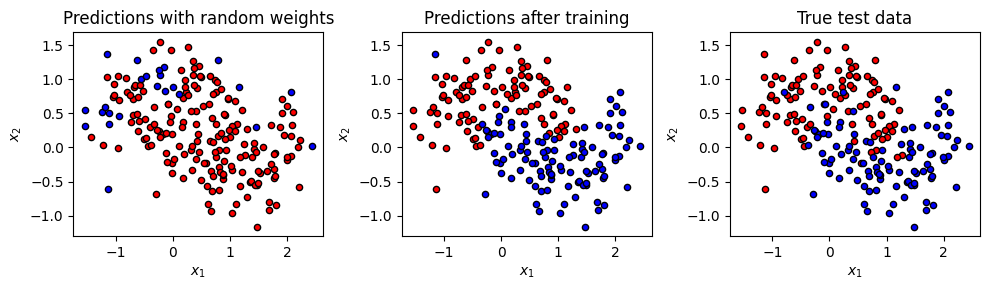

In [ ]:
print(
    "Cost: {:3f} | Train accuracy {:3f} | Test Accuracy : {:3f}".format(
        loss, accuracy_train, accuracy_test
    )
)

print("Learned weights")
for i in range(num_layers):
    print("Layer {}: {}".format(i, params[i]))


fig, axes = plt.subplots(1, 3, figsize=(10, 3))
plot_data(X_test, initial_predictions, fig, axes[0])
plot_data(X_test, predicted_test, fig, axes[1])
plot_data(X_test, y_test, fig, axes[2])
axes[0].set_title("Predictions with random weights")
axes[1].set_title("Predictions after training")
axes[2].set_title("True test data")
plt.tight_layout()
plt.show()

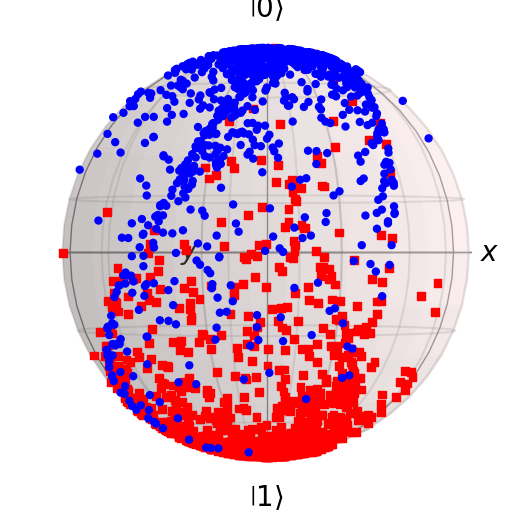

In [ ]:
states_class_A = []
states_class_B = []


Xa = []; Ya = []; Za = []
Xb = []; Yb = []; Zb = []

for i in range(len(X_train)):
  state = circuit_test2(params, X_train[i])
  alpha, beta = state
  my_state = [complex(alpha), complex(beta)]
  polar = to_spherical(my_state)
  xx, yy, zz = to_cartesian(polar)

  if int(y_train[i]) == 0:
    states_class_A.append(state)
    Xa.append(xx)
    Ya.append(yy)
    Za.append(zz)
  else:
    states_class_B.append(state)
    Xb.append(xx)
    Yb.append(yy)
    Zb.append(zz)
  


bloch_sphere = Bloch(view=[160,0])
pnts = [Xa, Ya, Za]
bloch_sphere.add_points(pnts)
bloch_sphere.render()

bloch_sphere.add_points([Xb, Yb, Zb])
bloch_sphere.render()

bloch_sphere.show()